In [ ]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
import pandas as pd

import numpy as np

adult_training = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv");

adult_training

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [ ]:
p_crosstab = pd.crosstab(adult_training.workclass, adult_training.sex)

print(p_crosstab)

sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


Contingency table of workclass and sex.

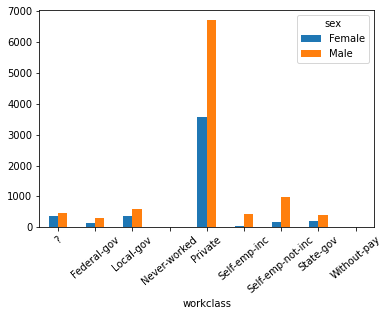

In [ ]:
barplot = p_crosstab.plot.bar(rot=40)

Plot of contigency table.

In [ ]:
adult_training.rename(columns={'marital-status': 'marital_status'}, inplace=True)

In [ ]:
p_crosstab2= pd.crosstab(adult_training.marital_status, adult_training.sex)

print(p_crosstab2)

sex                    Female  Male
marital_status                     
Divorced                 1219   795
Married-AF-spouse           7     4
Married-civ-spouse        761  6010
Married-spouse-absent      95   104
Never-married            2160  2717
Separated                 290   182
Widowed                   380    73


Contingency table of workclass and marital status.

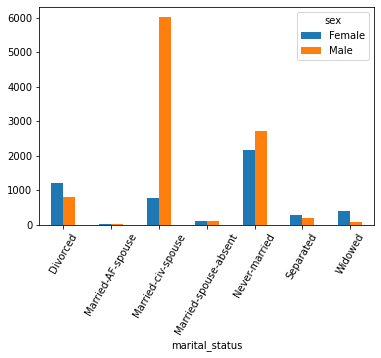

In [ ]:
barplot = p_crosstab2.plot.bar(rot=60)

Plot of contigency table.

In [ ]:
adultOver40 = adult_training['age']>40
print(adultOver40)

0         True
1        False
2         True
3         True
4        False
         ...  
14792     True
14793    False
14794    False
14795     True
14796    False
Name: age, Length: 14797, dtype: bool


Creating a new data frame that is a true false table. If age is over 40, true, else false.

In [ ]:
p_crosstab3 =pd.crosstab(adultOver40, adult_training.sex)

print(p_crosstab3)

sex    Female  Male
age                
False    3106  5547
True     1806  4338


Contigency table of adults over 40 and sex. 

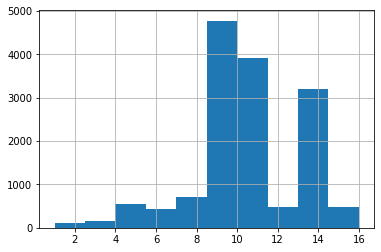

In [ ]:
adult_training.education.hist()

In [ ]:
adult_training.education.describe()

count    14797.000000
mean        10.068798
std          2.598297
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education, dtype: float64

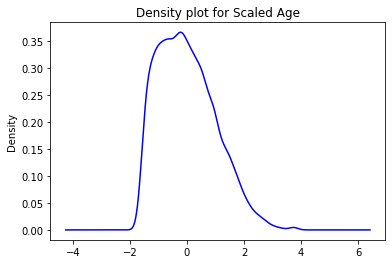

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt


adult_training['scaled_age'] = stats.zscore(adult_training.age, nan_policy='omit')


adult_training.scaled_age.plot.density(color="blue")
plt.title('Density plot for Scaled Age')
plt.show()


In [ ]:
adult_training.scaled_age.describe()

count    1.479700e+04
mean     5.678291e-17
std      1.000034e+00
min     -1.585523e+00
25%     -7.813360e-01
50%     -1.233649e-01
75%      6.808219e-01
max      3.751354e+00
Name: scaled_age, dtype: float64

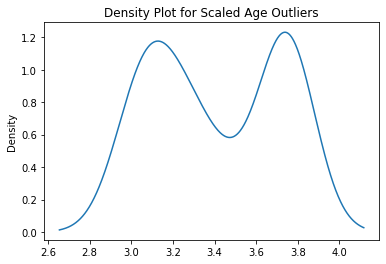

In [ ]:
adult_training_outliers = adult_training.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']
adult_training_outliers.plot.density()
plt.title('Density Plot for Scaled Age Outliers')
plt.show()


In [ ]:
adult_training['Age_binned'] = pd.cut(x = adult_training['age'], 
            bins = [79,120],
            labels=["80_Over",])

adult_training['Age_binned'].value_counts()


80_Over    60
Name: Age_binned, dtype: int64

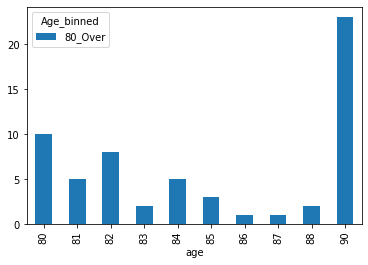

In [ ]:
p_crosstab6 = pd.crosstab(adult_training.age, adult_training.Age_binned)


# x label rotation
barplot = p_crosstab6.plot.bar(rot=90)


This bar plot was to see that all the values over 80 we inside the 80 and over bin.

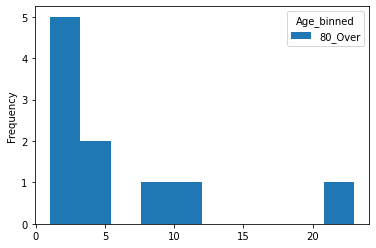

In [ ]:
p_crosstab6.plot.hist()

This graph I cross tabulated with age so I was able to graph the histogram.

The graph amost seems to be right tailed/ partially bimodal. It shows that about 4/5ths of the data falls between the first half of the histogram while there is a 1/5 percentasge at the end. 

In [ ]:
import pandas as pd

import numpy as np

nutrition_subset = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv");

nutrition_subset

,food item,weight_in_grams,saturated_fat,cholesterol
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79
...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0
957,TEA; BREWED 8 FL OZ,240.00,0.0,0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0


In [ ]:
nutrition_subset.sort_values(by='saturated_fat', ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195
...,...,...,...,...
731,TOMATOES; RAW 1 TOMATO,123.0,0.0,0
730,RASPBERRIES; RAW 1 CUP,123.0,0.0,0
727,TOMATO JUICE; CANNED W/O SALT 1 CUP,244.0,0.0,0
726,TOMATO JUICE; CANNED WITH SALT1 CUP,244.0,0.0,0


CHEESECAKE 1 CAKE	
ICE CREAM; VANLLA; RICH 16% FT1/2 GAL
YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE
CREME PIE 1 PIE
LARD 1 CUP

Looking at the sizes of each, the list would clearly be different if all were weighed at the same weight. 

In [ ]:
nutrition_subset['saturated_fat_per_gram'] = nutrition_subset['saturated_fat']/nutrition_subset['weight_in_grams']

In [ ]:
nutrition_subset.sort_values(by='saturated_fat_per_gram', ascending=False)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000
...,...,...,...,...,...
731,TOMATOES; RAW 1 TOMATO,123.0,0.0,0,0.000000
730,RASPBERRIES; RAW 1 CUP,123.0,0.0,0,0.000000
727,TOMATO JUICE; CANNED W/O SALT 1 CUP,244.0,0.0,0,0.000000
726,TOMATO JUICE; CANNED WITH SALT1 CUP,244.0,0.0,0,0.000000


BUTTER; SALTED 1 TBSP Had the most saturated fat per gram.

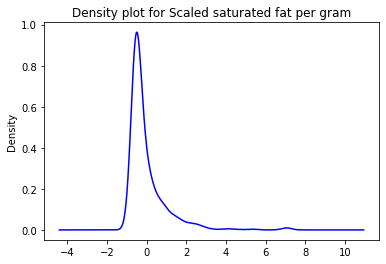

In [ ]:
nutrition_subset['scaled_sfpg'] = stats.zscore(nutrition_subset.saturated_fat_per_gram, nan_policy='omit')


nutrition_subset.scaled_sfpg.plot.density(color="blue")
plt.title('Density plot for Scaled saturated fat per gram')
plt.show()

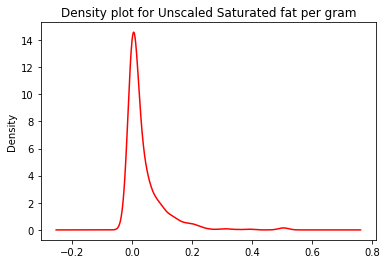

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt


nutrition_subset['scaled_sfpg'] = stats.zscore(nutrition_subset.saturated_fat_per_gram, nan_policy='omit')

nutrition_subset.saturated_fat_per_gram.plot.density(color="red")
plt.title('Density plot for Unscaled Saturated fat per gram')
plt.show()

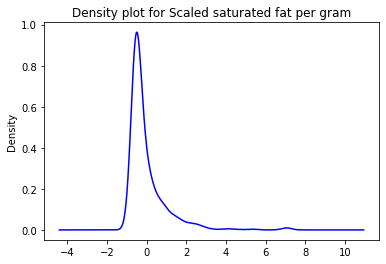

In [ ]:
nutrition_subset.scaled_sfpg.plot.density(color="blue")
plt.title('Density plot for Scaled saturated fat per gram')
plt.show()


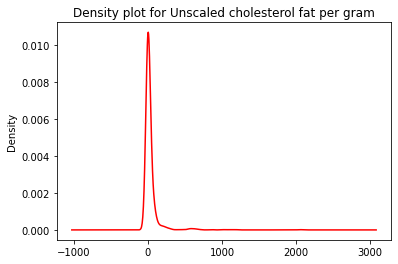

In [ ]:
nutrition_subset.cholesterol.plot.density(color="red")
plt.title('Density plot for Unscaled cholesterol fat per gram')
plt.show()

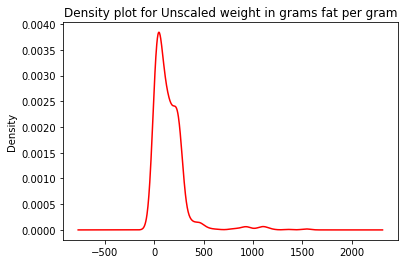

In [ ]:
nutrition_subset.weight_in_grams.plot.density(color="red")
plt.title('Density plot for Unscaled weight in grams fat per gram')
plt.show()

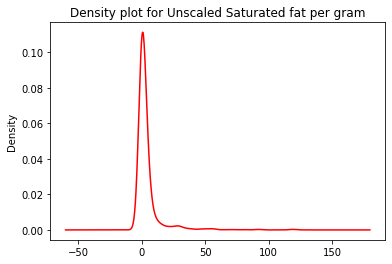

In [ ]:
nutrition_subset.saturated_fat.plot.density(color="red")
plt.title('Density plot for Unscaled Saturated fat per gram')
plt.show()